In [ ]:
import pandas as pd

# Load the dataset
file_path = '/Dataset .csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## **Level 1 task 1 Data Exploration and Preprocessing**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the dataset
num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 9551
Number of columns: 21


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Handle missing values (dropping columns with significant missing values or filling them)
# For this example, we'll drop columns with more than 50% missing values and fill others with appropriate values
threshold = 0.5 * num_rows
columns_to_drop = missing_values[missing_values > threshold].index
data = data.drop(columns=columns_to_drop)

# Fill missing values for remaining columns
data = data.fillna({
    'Longitude': data['Longitude'].mean(),
    'Latitude': data['Latitude'].mean(),
    'Votes': 0,
    'Price range': data['Price range'].mode()[0],
})

Missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


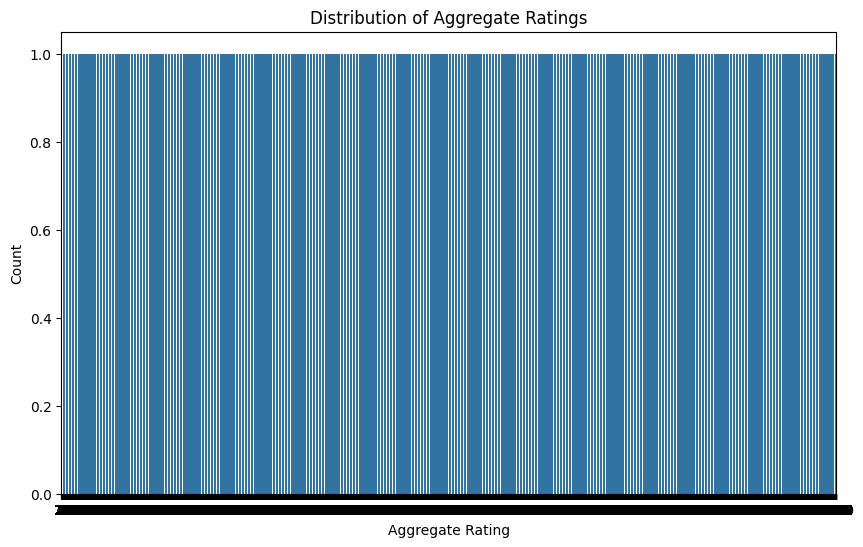

Class distribution of Aggregate Ratings:
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


In [ ]:
# Perform data type conversion if necessary
data['Votes'] = data['Votes'].astype(int)
data['Price range'] = data['Price range'].astype(int)
data['Aggregate rating'] = data['Aggregate rating'].astype(float)

# Analyze the distribution of the target variable ("Aggregate rating")
plt.figure(figsize=(10, 6))
sns.countplot(data['Aggregate rating'])
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()

# Identify class imbalances
rating_counts = data['Aggregate rating'].value_counts()
print("Class distribution of Aggregate Ratings:")
print(rating_counts)

## **Level 1 Task 2 Descriptive Analysis**



In [ ]:
# Calculate basic statistical measures for numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
basic_stats = data[numerical_columns].describe()
print("Basic Statistical Measures:")
print(basic_stats)

Basic Statistical Measures:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250

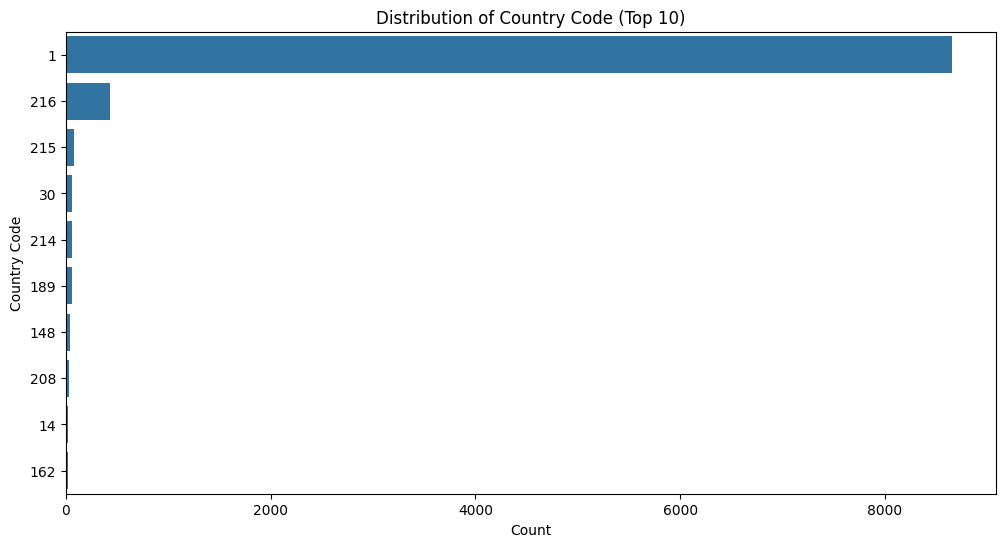

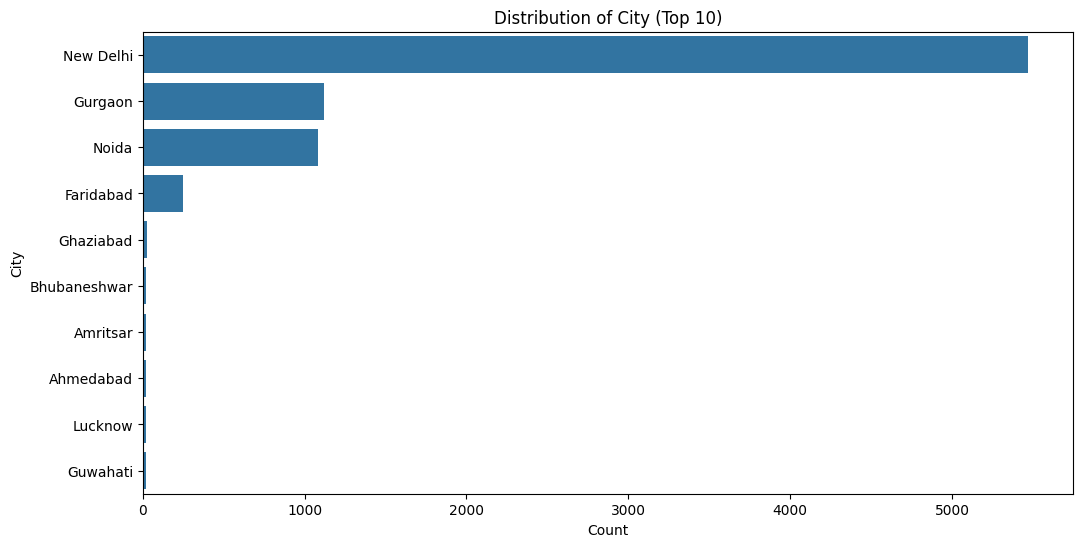

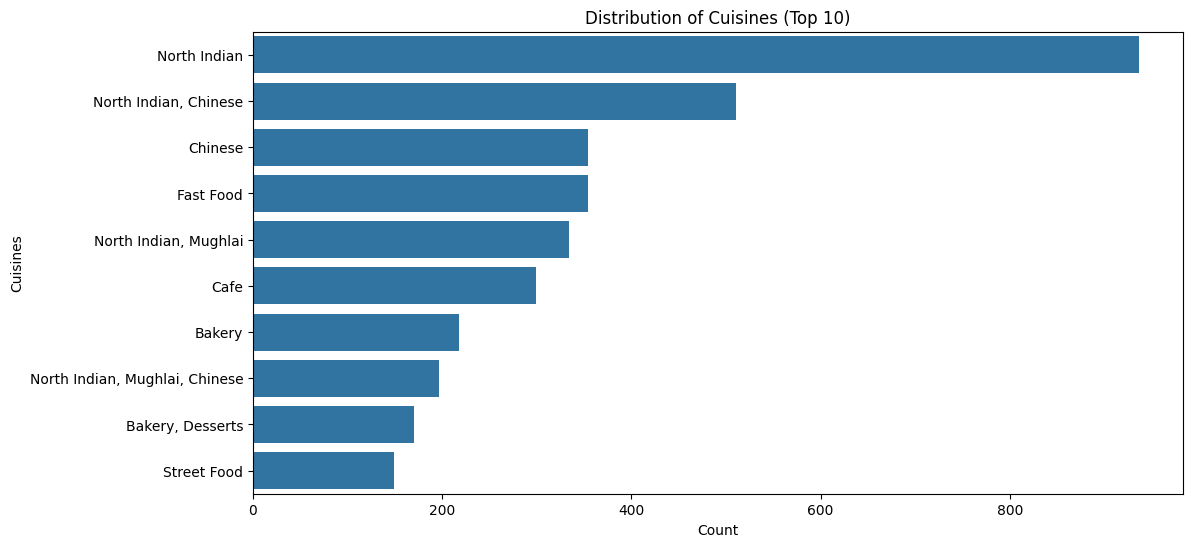

In [ ]:
# Explore the distribution of categorical variables
categorical_columns = ['Country Code', 'City', 'Cuisines']

for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    # Display only the top 10 most frequent categories
    top_categories = data[column].value_counts().head(10).index
    sns.countplot(y=data[column], order=top_categories)
    plt.title(f'Distribution of {column} (Top 10)')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.show()

In [ ]:
# Identify the top cuisines with the highest number of restaurants
top_cuisines = data['Cuisines'].value_counts().head(10)
print("Top 10 Cuisines with the Highest Number of Restaurants:")
print(top_cuisines)


Top 10 Cuisines with the Highest Number of Restaurants:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


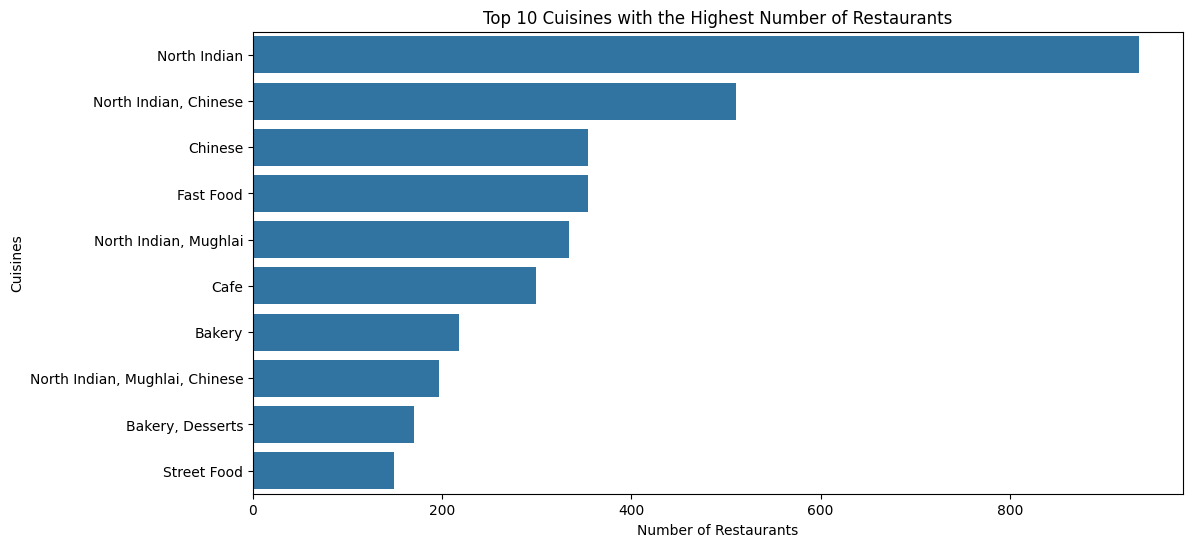

In [ ]:
# Visualize the top cuisines
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title('Top 10 Cuisines with the Highest Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisines')
plt.show()


Top 10 Cities with the Highest Number of Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


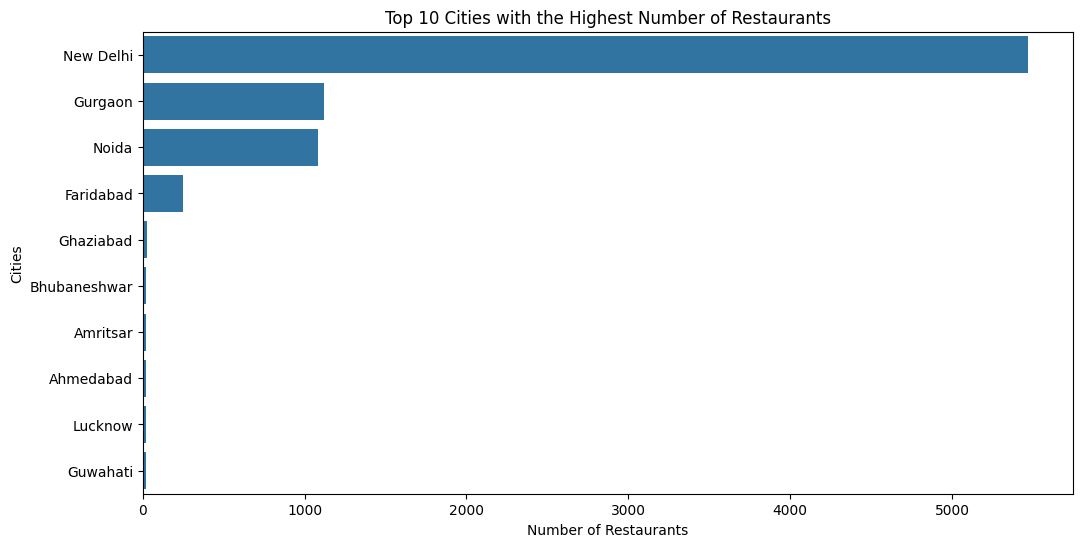

In [ ]:
# Identify the top cities with the highest number of restaurants
top_cities = data['City'].value_counts().head(10)
print("Top 10 Cities with the Highest Number of Restaurants:")
print(top_cities)

# Visualize the top cities
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Cities with the Highest Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cities')
plt.show()

## **Level 1 Task 3: geospatial analysis**

In [ ]:
import folium
# Visualize the locations of restaurants on a map using latitude and longitude
# Create a map centered around a specific latitude and longitude (mean of the dataset)
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)


In [ ]:
# Add restaurant locations to the map
for idx, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name'],
        icon=folium.Icon(color='blue', icon='cutlery', prefix='fa')
    ).add_to(restaurant_map)


In [ ]:
# Save the map as an HTML file in the current working directory
restaurant_map.save('restaurant_map.html')


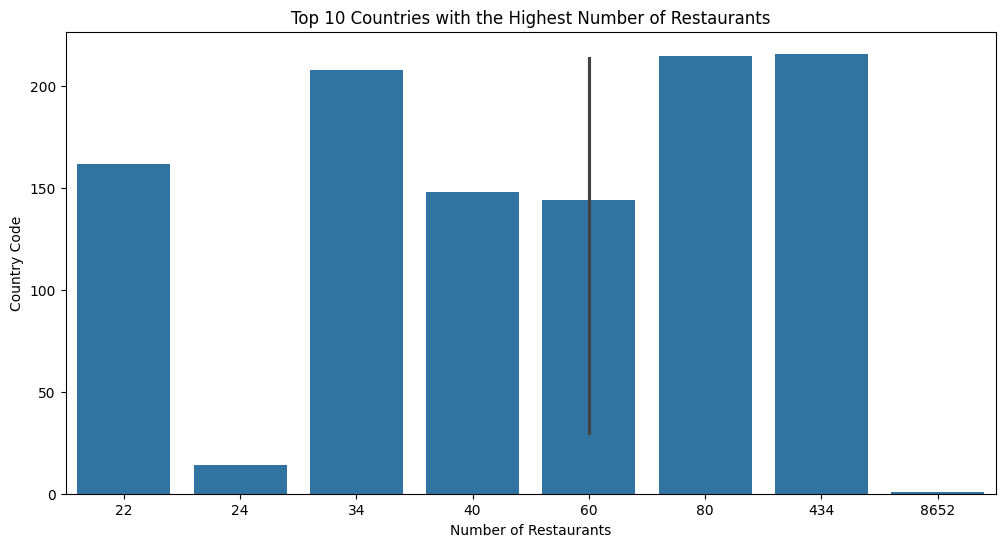

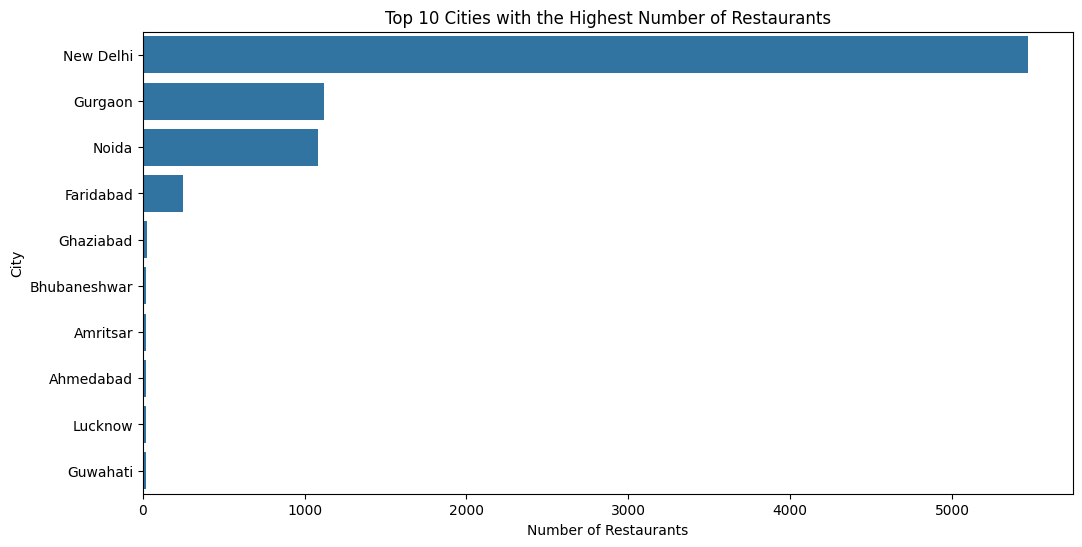

In [ ]:
# Analyze the distribution of restaurants across different cities or countries
plt.figure(figsize=(12, 6))
top_countries = data['Country Code'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries with the Highest Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Country Code')
plt.show()

plt.figure(figsize=(12, 6))
top_cities = data['City'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Cities with the Highest Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

In [ ]:
# Determine if there is any correlation between the restaurant's location and its rating
# Focus on top 20 cities by number of restaurants for better readability
top_cities = data['City'].value_counts().head(20).index
filtered_data = data[data['City'].isin(top_cities)]


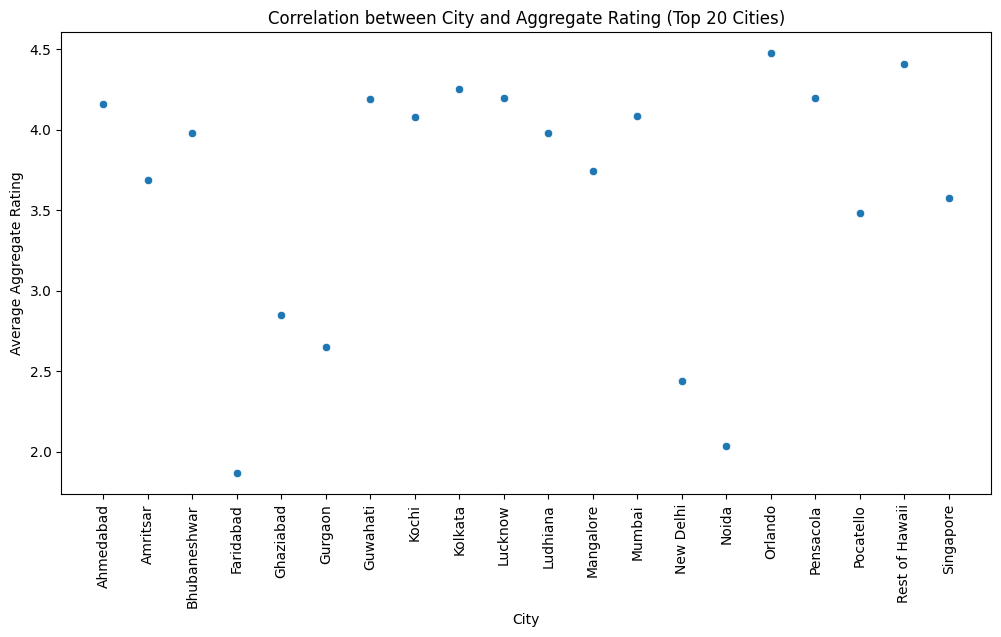

In [ ]:
# Group by City and calculate mean rating for each city
city_ratings = filtered_data.groupby('City')['Aggregate rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=city_ratings, x='City', y='Aggregate rating')
plt.title('Correlation between City and Aggregate Rating (Top 20 Cities)')
plt.xlabel('City')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=90)
plt.show()

Correlation matrix:
                  Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


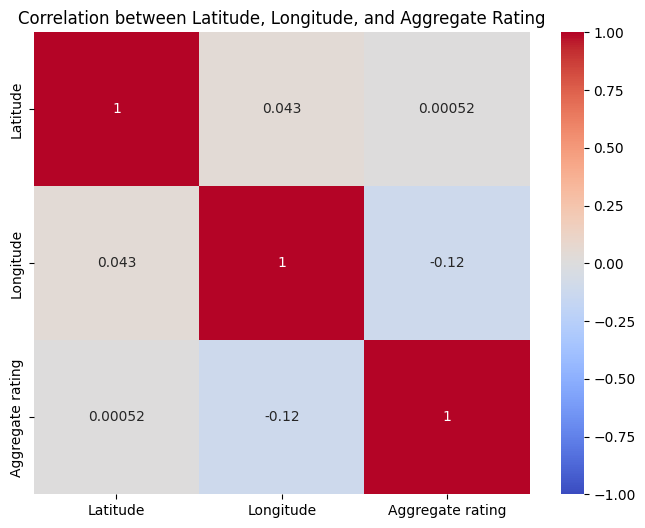

In [ ]:
# Calculate correlation between latitude, longitude, and aggregate rating
correlation_matrix = data[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print("Correlation matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Latitude, Longitude, and Aggregate Rating')
plt.show()

In [ ]:
from google.colab import files
files.download('restaurant_map.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>